<a href="https://colab.research.google.com/github/Knightler/PyTorch-projects/blob/main/pytorch_pratice02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 960.9/960.9 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 47.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 36.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 24.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 61.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [2]:
import torch
import torch.nn as nn

import torchvision
from torch.utils.data import DataLoader, Dataset
from torchvision.datasets import ImageFolder
from torchvision import datasets, transforms

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from PIL import Image

from torchmetrics.classification import Accuracy

In [3]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

In [4]:
train_dataset = datasets.MNIST(root="./data", train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root="./data", train=False, download=True, transform=transform)

len(train_dataset), len(test_dataset)

100%|██████████| 9.91M/9.91M [00:00<00:00, 15.1MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 460kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.21MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 5.61MB/s]


(60000, 10000)

In [5]:
train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=64, shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7b8ea82a43d0>,
 <torch.utils.data.dataloader.DataLoader at 0x7b8e895c8f50>)

In [6]:
images, labels = next(iter(train_dataloader))

image, label = train_dataset[0]
image.shape, label

(torch.Size([1, 28, 28]), 5)

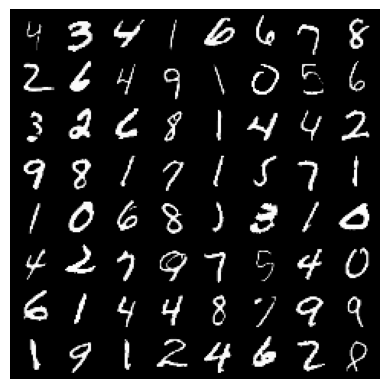

In [7]:
torch.manual_seed(42)

img_grid = torchvision.utils.make_grid(images[:64], nrow=8)

npimg = img_grid.cpu().numpy()

plt.imshow(np.transpose(npimg, (1, 2, 0)))
plt.axis(False)
plt.show()

In [8]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()

        self.fc1 = nn.Linear(in_features=1*28*28, out_features=512)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(in_features=512, out_features=256)
        self.relu = nn.ReLU()
        self.fc3 = nn.Linear(in_features=256, out_features=10)

        # self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1)
        # self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)

        # self.relu = nn.ReLU()

        # self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)

        # self.flatten = nn.Flatten()

        # self.linear1 = nn.Linear(in_features=64 * 14 * 14, out_features=32)
        # self.output = nn.Linear(in_features=32, out_features=10)

    def forward(self, x):

        x = x.view(-1, 1*28*28)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)

        # x = self.relu(self.conv1_1(x))
        # x = self.relu(self.conv1_2(x))
        # x = self.maxpool(x)

        # x = self.flatten(x)

        # x = self.relu(self.linear1(x))
        # x = self.output(x)

        return x

model_0 = CNN()
model_0

CNN(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=10, bias=True)
)

In [9]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_0.parameters(), lr=0.001)

In [10]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [11]:
torch.manual_seed(42)

model_0 = model_0.to(device)
epochs = 5

for epoch in range(epochs):
    model_0.train()
    correct = 0
    total = 0

    ### TRAIN
    for images, labels in train_dataloader:
        images, labels = images.to(device), labels.to(device)
        y_pred = model_0(images)
        loss = criterion(y_pred, labels)
        preds = y_pred.argmax(dim=1)

        # correct += (preds == labels).sum().item()
        # total += labels.size(0)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # acc_train = correct_train / total

    ### TEST
    model_0.eval()
    with torch.no_grad():
        loss_test = 0
        for images, labels in test_dataloader:
            images, labels = images.to(device), labels.to(device)
            y_test = model_0(images)
            loss_test += criterion(y_test, labels)

            # _, predicted = torch.max(loss_test, 1)  # Get predicted class
            preds_test = y_test.argmax(dim=1)
            correct += (preds_test == labels).sum().item()
            total += labels.size(0)

        loss_test /= len(test_dataloader)
        accuracy = 100 * correct / total

    print(f"Epoch {epoch+1}: Train Loss: {loss.item():.4f}| Test Loss: {loss_test.item():.4f}, Test Acc: {accuracy:.2f}%")



Epoch 1: Train Loss: 0.3081| Test Loss: 0.1548, Test Acc: 94.75%
Epoch 2: Train Loss: 0.0438| Test Loss: 0.1118, Test Acc: 96.54%
Epoch 3: Train Loss: 0.0968| Test Loss: 0.1087, Test Acc: 96.53%
Epoch 4: Train Loss: 0.0360| Test Loss: 0.1042, Test Acc: 96.66%
Epoch 5: Train Loss: 0.0346| Test Loss: 0.0927, Test Acc: 97.29%


In [12]:
torch.save(model_0.state_dict(), 'mnist.pth')
model_0.load_state_dict(torch.load('mnist.pth'))

<All keys matched successfully>